In [25]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [26]:
all_df = pd.read_csv("data/data.csv")

In [27]:
all_df['class']= all_df['class'].map({'RB':0, 'NRB': 1}).astype(int)

In [28]:
X=all_df.drop(['class'], axis=1).values.astype('float64')

In [29]:
Y = all_df['class'].values.astype('int64')

In [30]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

844

In [31]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [32]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [33]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [34]:
model = Sequential()

In [35]:
model.add(Conv1D(filters=100,
                 kernel_size=5,
                 padding='valid',
                 input_shape=(41,1), 
                 activation='relu'))

In [36]:
model.add(Conv1D(filters=50,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [37]:
model.add(MaxPooling1D(pool_size=1))

In [38]:
model.add(Flatten())

In [39]:
model.add(Dense(5, activation='tanh'))

In [40]:
model.add(Dense(1,activation='sigmoid'))

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 37, 100)           600       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 37, 50)            5050      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 37, 50)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1850)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 9255      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 14,911
Trainable params: 14,911
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [43]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=30,verbose=1,callbacks=[early_stopping])

Train on 675 samples, validate on 169 samples
Epoch 1/60
675/675 [==============================] - 1s 2ms/step - loss: 0.5361 - acc: 0.6889 - val_loss: 0.4275 - val_acc: 0.7811
Epoch 2/60
675/675 [==============================] - 0s 392us/step - loss: 0.3876 - acc: 0.8370 - val_loss: 0.3705 - val_acc: 0.8225
Epoch 3/60
675/675 [==============================] - 0s 295us/step - loss: 0.3410 - acc: 0.8652 - val_loss: 0.3176 - val_acc: 0.8698
Epoch 4/60
675/675 [==============================] - 0s 540us/step - loss: 0.3132 - acc: 0.8652 - val_loss: 0.3022 - val_acc: 0.8817
Epoch 5/60
675/675 [==============================] - 0s 382us/step - loss: 0.2990 - acc: 0.8815 - val_loss: 0.2872 - val_acc: 0.8935
Epoch 6/60
675/675 [==============================] - 0s 545us/step - loss: 0.2885 - acc: 0.8844 - val_loss: 0.2820 - val_acc: 0.8935
Epoch 7/60
675/675 [==============================] - 0s 338us/step - loss: 0.2819 - acc: 0.8815 - val_loss: 0.2810 - val_acc: 0.8994
Epoch 8/60
675/675

In [44]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

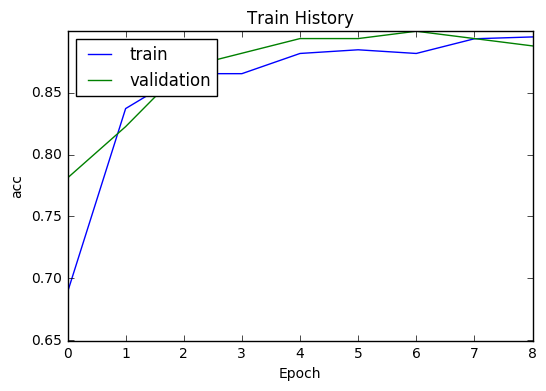

In [45]:
show_train_history(train_history,'acc','val_acc')

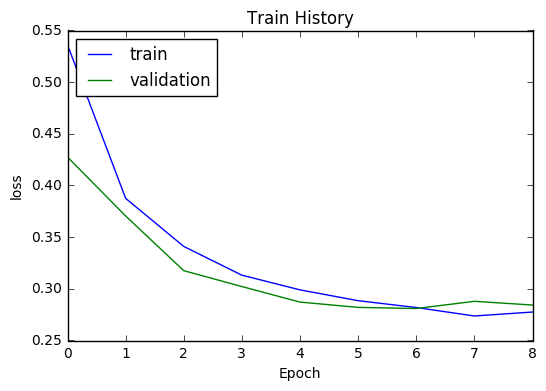

In [46]:
show_train_history(train_history,'loss','val_loss')

In [47]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

211/211 [==============================] - 0s 386us/step


In [48]:
scores[1]

0.8483412308150559